In [1]:
import numpy as np
import scipy.special as sp
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=22)
plt.rcParams['figure.figsize'] = (10.0, 7.0)
# For multiple axes in one fig
from matplotlib import gridspec 
# For TeX fonts
plt.rc('text', usetex=True)

In [2]:
# Neutron to Gamma Pulse Shape Discrimination in Liquid
# Argon Detectors with High Quantum Efficiency
# Photomultiplier Tubes

In [3]:
tauT = 1450 # ns, 1.3 - 1.6 us according to WARP
tauS = 5.5

LY = 6.35# phe/keV±
prompt = 120 # ns

fprompt_er = 0.3
fprompt_nr = 0.65 # Values read from fig. 7 for 50 keV
E = 50

# fprompt_er = 0.25
# fprompt_nr = 0.8
# E = 100

In [4]:
import matplotlib as mpl
def draw_box(x, y, **kwargs):
    """Draw rectangle, given x-y boundary tuples"""
    # Arcane syntax of the week: matplotlib's Rectangle...
    plt.gca().add_patch(mpl.patches.Rectangle(
        (x[0], y[0]), x[1] - x[0], y[1] - y[0], **kwargs))

In [5]:
def single_pe(t, t0, tau):
    return np.concatenate([np.zeros(np.sum(t < t0)), np.exp(-(t[t>=t0] - t0) / tau)])
    # return np.exp(-(t - t0) / tau) * (t > t0)

In [6]:
def simpulse(t, fS, nph, tau, jitter):
    nph = np.int(nph)
    nS = np.int(fS * nph)
    nT = nph - nS
    
    timesS = np.random.exponential(scale=tauS, size = nS)
    timesT = np.random.exponential(scale=tauT, size = nT)
    times = np.concatenate([timesS, timesT])
    times += np.random.normal(0, jitter, nph)
    ys = np.zeros(len(t))
    for time in times:
        ys = ys + single_pe(t, time, tau)
        
    return ys

In [7]:
t = np.linspace(-300, 4000, 2151)
y_er = simpulse(t, fprompt_er, E * LY, 10, 20)
y_nr = simpulse(t, fprompt_nr, E * LY, 10, 20)

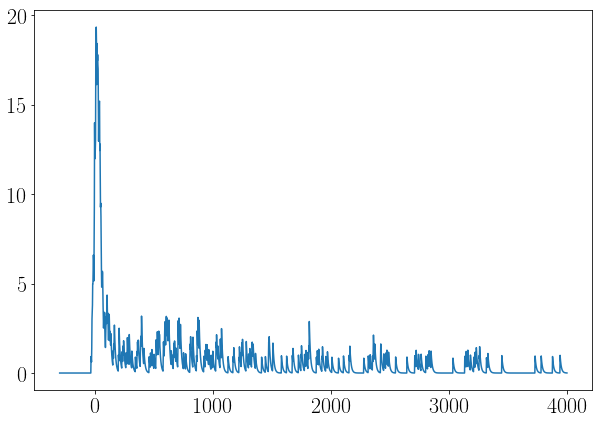

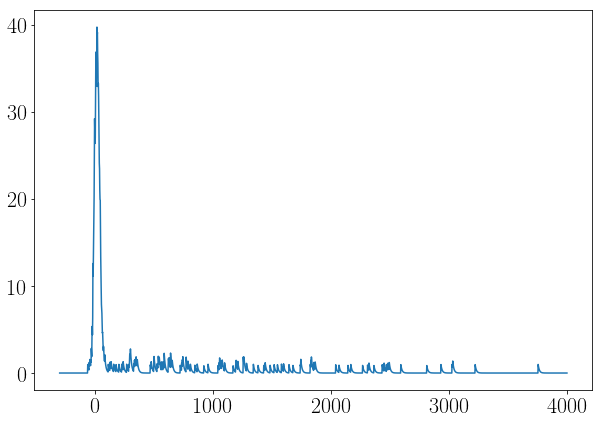

In [8]:
plt.plot(t, y_er)

plt.show()

plt.plot(t, y_nr)
# plt.ylim(0, 25)
# plt.yscale('log')
plt.show()

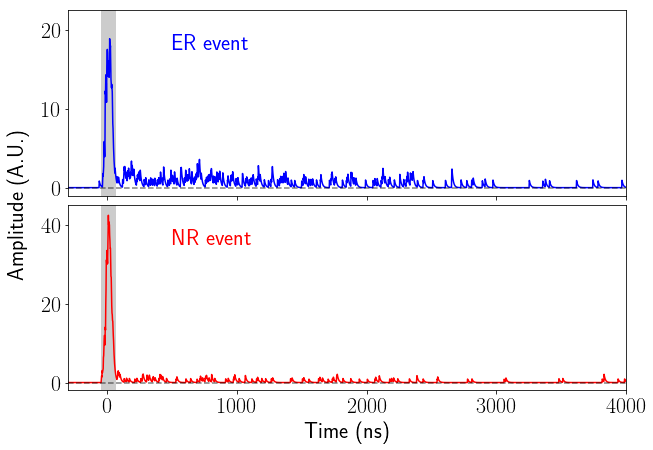

In [28]:
plt.figure(figsize = (10, 7))
gs = gridspec.GridSpec(2, 1, hspace = 0.05, wspace = 0.05) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
plt.sca(ax0)
plt.plot(t, y_er, color='blue')
# plt.ylim(-2, 45)
plt.ylim(-1, 22.5)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 35/2, 'ER event', color='blue')
plt.xlim(-300, 4000)
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
ax0.axes.xaxis.set_ticklabels([])

# plt.xticks([])

plt.sca(ax1)
plt.plot(t, y_nr, color='red')
plt.ylim(-2, 45)
plt.xlim(-300, 4000)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 35, 'NR event', color='red')
plt.ylabel('Amplitude (A.U.)')
ax1.yaxis.set_label_coords(-0.07, 1)
plt.xlabel('Time (ns)')
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
plt.savefig('plots/argon_waveform_option0.pdf', bbox_inches='tight')
plt.savefig('plots/argon_waveform_option0.png', bbox_inches='tight')

plt.show()

In [21]:
tmax = 8000
dt = 2 # ns
ymax = 50

t = np.linspace(-300, tmax, (tmax + 300) / dt + 1)
y_er = simpulse(t, fprompt_er, E * LY, 10, 20)
y_nr = simpulse(t, fprompt_nr, E * LY, 10, 20)

if np.max(np.concatenate([y_er, y_nr])) > ymax:
    print('Warning: %.2f > %.2f' % (np.max(np.concatenate([y_er, y_nr])), ymax))

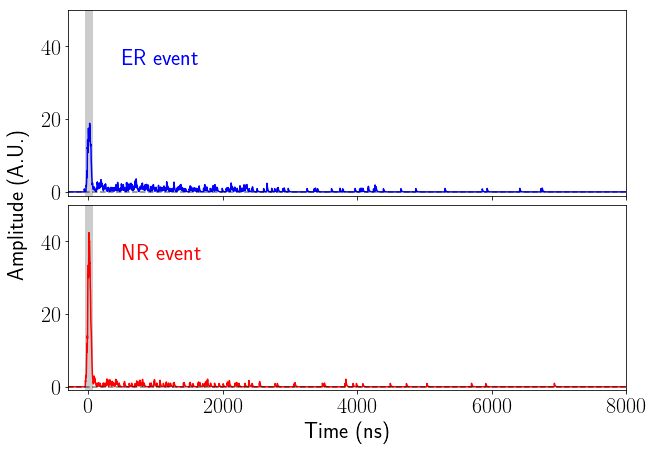

In [31]:
tmax = 8000

plt.figure(figsize = (10, 7))
gs = gridspec.GridSpec(2, 1, hspace = 0.05, wspace = 0.05) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
plt.sca(ax0)
plt.plot(t, y_er, color='blue')
# plt.ylim(-2, 45)
plt.ylim(-1, ymax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 35, 'ER event', color='blue')
plt.xlim(-300, tmax)
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
ax0.axes.xaxis.set_ticklabels([])

# plt.xticks([])

plt.sca(ax1)
plt.plot(t, y_nr, color='red')
plt.ylim(-1,ymax)
plt.xlim(-300, tmax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 35, 'NR event', color='red')
plt.ylabel('Amplitude (A.U.)')
ax1.yaxis.set_label_coords(-0.07, 1)
plt.xlabel('Time (ns)')
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
plt.savefig('plots/argon_waveform_option1.pdf', bbox_inches='tight')
plt.savefig('plots/argon_waveform_option1.png', bbox_inches='tight')
plt.show()

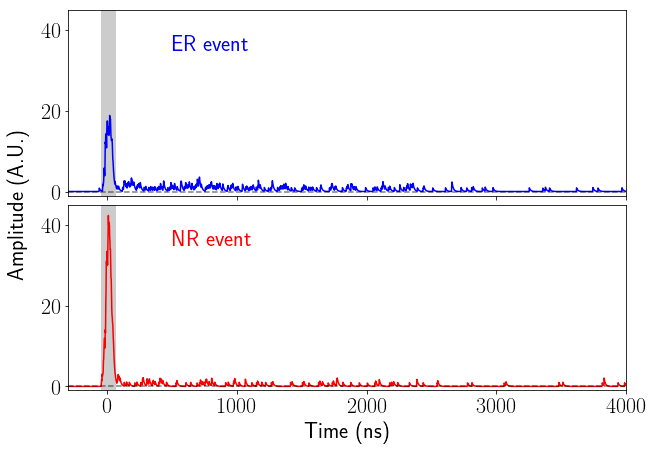

In [32]:
tmax = 4000
ymax = 45

plt.figure(figsize = (10, 7))
gs = gridspec.GridSpec(2, 1, hspace = 0.05, wspace = 0.05) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
plt.sca(ax0)
plt.plot(t, y_er, color='blue')
# plt.ylim(-2, 45)
plt.ylim(-1, ymax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 35, 'ER event', color='blue')
plt.xlim(-300, tmax)
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
ax0.axes.xaxis.set_ticklabels([])

# plt.xticks([])

plt.sca(ax1)
plt.plot(t, y_nr, color='red')
plt.ylim(-1,ymax)
plt.xlim(-300, tmax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 35, 'NR event', color='red')
plt.ylabel('Amplitude (A.U.)')
ax1.yaxis.set_label_coords(-0.07, 1)
plt.xlabel('Time (ns)')
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
plt.savefig('plots/argon_waveform_option2.pdf', bbox_inches='tight')
plt.savefig('plots/argon_waveform_option2.png', bbox_inches='tight')
plt.show()

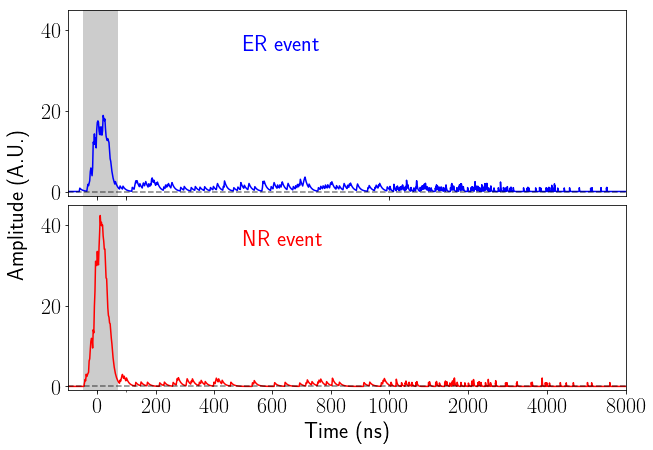

In [52]:
tmax = 8000

plt.figure(figsize = (10, 7))
gs = gridspec.GridSpec(2, 1, hspace = 0.05, wspace = 0.05) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
plt.sca(ax0)
plt.plot(t, y_er, color='blue')
# plt.ylim(-2, 45)
plt.ylim(-1, ymax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 35, 'ER event', color='blue')
plt.xscale('symlog', linthreshx=1000)
plt.xlim(-100, tmax)
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
ax0.axes.xaxis.set_ticklabels([])

# plt.xticks([])

plt.sca(ax1)
plt.plot(t, y_nr, color='red')
plt.ylim(-1,ymax)
plt.xscale('symlog', linthreshx=1000)
plt.xlim(-100, tmax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 35, 'NR event', color='red')
plt.ylabel('Amplitude (A.U.)')
ax1.yaxis.set_label_coords(-0.07, 1)
plt.xlabel('Time (ns)')
xt = [0, 200, 400, 600, 800, 1000, 2000, 4000, 8000]
xtmarks = ['$%s$' % _xt for _xt in xt]
plt.xticks(xt, xtmarks)
# plt.xticks([0, 200, 400, 600, 800, 1000], ['0', '200', '400', '600', '800', '1000'])
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
#plt.savefig('plots/argon_waveform_option3.pdf', bbox_inches='tight')
#plt.savefig('plots/argon_waveform_option3.png', bbox_inches='tight')
plt.show()

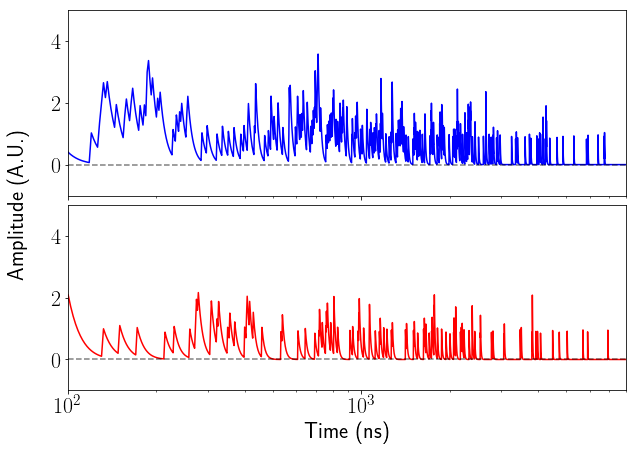

In [58]:
tmax = 8000
ymax = 5


plt.figure(figsize = (10, 7))
gs = gridspec.GridSpec(2, 1, hspace = 0.05, wspace = 0.05) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
plt.sca(ax0)
plt.plot(t, y_er, color='blue')
# plt.ylim(-2, 45)
plt.ylim(-1, ymax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
# plt.text(500, 35, 'ER event', color='blue')
plt.xscale('log')
plt.xlim(100, tmax)
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
ax0.axes.xaxis.set_ticklabels([])

# plt.xticks([])

plt.sca(ax1)
plt.plot(t, y_nr, color='red')
plt.ylim(-1,ymax)
plt.xscale('log')
plt.xlim(100, tmax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
# plt.text(500, 35, 'NR event', color='red')
plt.ylabel('Amplitude (A.U.)')
ax1.yaxis.set_label_coords(-0.07, 1)
plt.xlabel('Time (ns)')
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
# plt.savefig('plots/argon_waveform_option2.pdf', bbox_inches='tight')
# plt.savefig('plots/argon_waveform_option2.png', bbox_inches='tight')
plt.show()

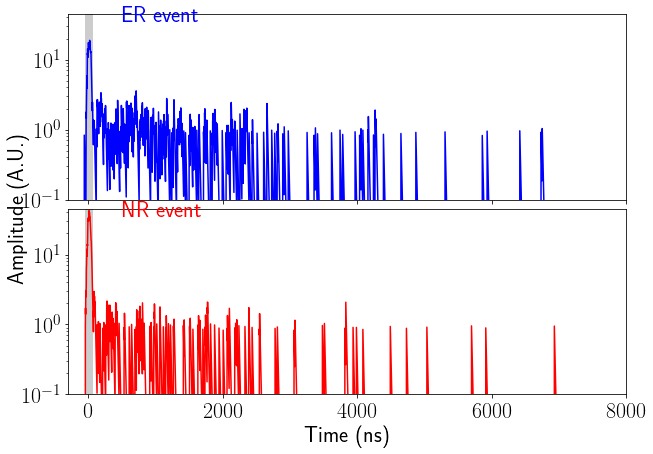

In [59]:
tmax = 8000
ymax = 45
ymin = 0.1

plt.figure(figsize = (10, 7))
gs = gridspec.GridSpec(2, 1, hspace = 0.05, wspace = 0.05) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
plt.sca(ax0)
plt.plot(t, y_er, color='blue')
# plt.ylim(-2, 45)
plt.ylim(ymin, ymax)
plt.yscale('log')
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 35, 'ER event', color='blue')
plt.xlim(-300, tmax)
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
ax0.axes.xaxis.set_ticklabels([])

# plt.xticks([])

plt.sca(ax1)
plt.plot(t, y_nr, color='red')
plt.ylim(ymin, ymax)
plt.yscale('log')
plt.xlim(-300, tmax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 35, 'NR event', color='red')
plt.ylabel('Amplitude (A.U.)')
ax1.yaxis.set_label_coords(-0.07, 1)
plt.xlabel('Time (ns)')
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
# plt.savefig('plots/argon_waveform_option2.pdf', bbox_inches='tight')
# plt.savefig('plots/argon_waveform_option2.png', bbox_inches='tight')
plt.show()

In [64]:
sel  = (t > 4000) & (t < 8000)

In [65]:
np.sum(y_er[sel])

90.480426228516009

In [66]:
np.sum(y_nr[sel])

36.460379769558735

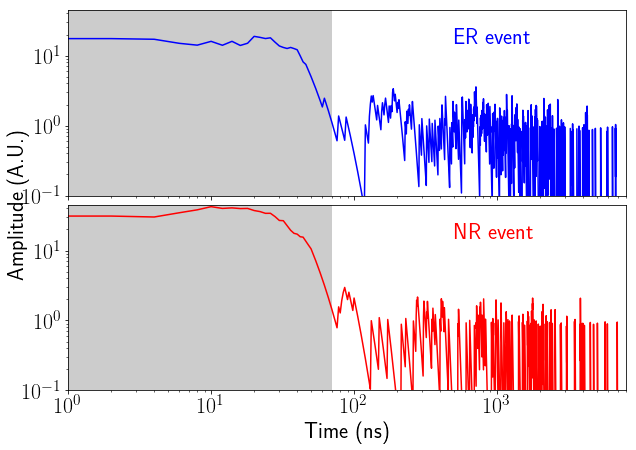

In [104]:
tmax = 8000
toff = 0
ymax = 45
ymin = 0.1
yscale = 'log'

plt.figure(figsize = (10, 7))
gs = gridspec.GridSpec(2, 1, hspace = 0.05, wspace = 0.05) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
plt.sca(ax0)
plt.plot(t + toff, y_er, color='blue')
# plt.ylim(-2, 45)
plt.ylim(ymin, ymax)
plt.yscale(yscale)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 15, 'ER event', color='blue')
plt.xlim(1, tmax)
plt.xscale('log')
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
ax0.axes.xaxis.set_ticklabels([])

# plt.xticks([])

plt.sca(ax1)
plt.plot(t + toff, y_nr, color='red')
plt.ylim(ymin, ymax)
plt.xlim(1, tmax)
plt.yscale(yscale)
plt.xscale('log')
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 15, 'NR event', color='red')
plt.ylabel('Amplitude (A.U.)')
ax1.yaxis.set_label_coords(-0.07, 1)
plt.xlabel('Time (ns)')
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
plt.savefig('plots/argon_waveform_option5.pdf', bbox_inches='tight')
plt.savefig('plots/argon_waveform_option5.png', bbox_inches='tight')
plt.show()

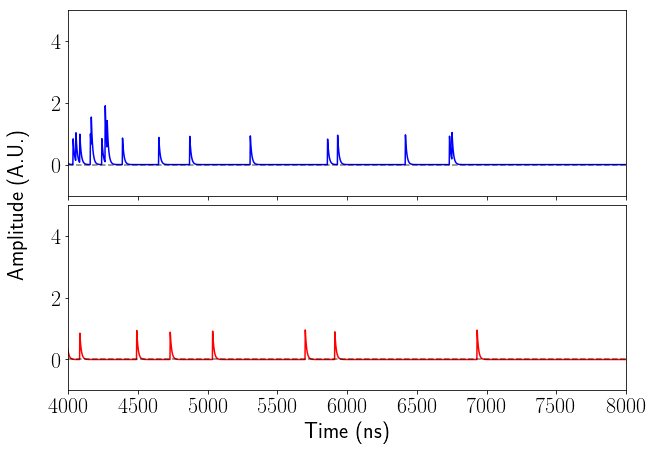

In [91]:
tmax = 8000
tmin = 4000
ymax = 5

plt.figure(figsize = (10, 7))
gs = gridspec.GridSpec(2, 1, hspace = 0.05, wspace = 0.05) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
plt.sca(ax0)
plt.plot(t, y_er, color='blue')
# plt.ylim(-2, 45)
plt.ylim(-1, ymax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
# plt.text(500, 35, 'ER event', color='blue')
plt.xlim(tmin, tmax)
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
ax0.axes.xaxis.set_ticklabels([])

# plt.xticks([])

plt.sca(ax1)
plt.plot(t, y_nr, color='red')
plt.ylim(-1,ymax)
plt.xlim(tmin, tmax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
# plt.text(500, 35, 'NR event', color='red')
plt.ylabel('Amplitude (A.U.)')
ax1.yaxis.set_label_coords(-0.07, 1)
plt.xlabel('Time (ns)')
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
plt.savefig('plots/argon_waveform_tail_only.pdf', bbox_inches='tight')
plt.savefig('plots/argon_waveform_tail_only.png', bbox_inches='tight')
plt.show()

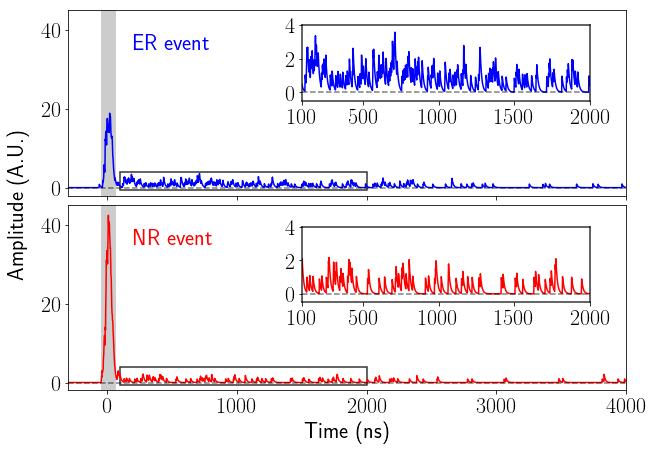

In [107]:
tmax = 4000
ymax = 45
ymin = -2

box_lw = 1.5
xbox = (100, 2000)
ybox = (-0.5, 4)

fig = plt.figure(figsize = (10, 7))
gs = gridspec.GridSpec(2, 1, hspace = 0.05, wspace = 0.05) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
plt.sca(ax0)
plt.plot(t, y_er, color='blue')
# plt.ylim(-2, 45)
plt.ylim(ymin, ymax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(200, 35, 'ER event', color='blue')
plt.xlim(-300, tmax)
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
ax0.axes.xaxis.set_ticklabels([])

draw_box(xbox, ybox, edgecolor='black', facecolor = 'None', lw=box_lw, alpha = 0.8)
box0 = fig.add_axes([0.45, 0.7, 0.4, 0.15])
plt.sca(box0)
plt.plot(t, y_er, color='blue')
plt.xlim(*xbox)
plt.ylim(*ybox)
plt.axhline(0, color='black', alpha=0.5,ls='--')



# plt.xticks([])

plt.sca(ax1)
plt.plot(t, y_nr, color='red')
plt.ylim(ymin,ymax)
plt.xlim(-300, tmax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(200, 35, 'NR event', color='red')
plt.ylabel('Amplitude (A.U.)')
ax1.yaxis.set_label_coords(-0.07, 1)
plt.xlabel('Time (ns)')
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')


draw_box(xbox, ybox, edgecolor='black', facecolor = 'None', lw=box_lw, alpha = 0.8)
box1 = fig.add_axes([0.45, 0.3, 0.4, 0.15])
plt.sca(box1)
plt.plot(t, y_nr, color='red')
plt.xlim(*xbox)
plt.ylim(*ybox)
plt.axhline(0, color='black', alpha=0.5,ls='--')

for ax in [box0, box1]:
    plt.sca(ax)
    plt.xticks([xbox[0], 500, 1000, 1500, 2000])
    plt.yticks([0, 2, 4])
    for spinelabel in ['top', 'bottom', 'left', 'right']:
        spine = ax.spines[spinelabel]
        spine.set_lw(box_lw)
        spine.set_alpha(0.8)


plt.savefig('plots/argon_waveform.pdf', bbox_inches='tight')
plt.savefig('plots/argon_waveform.png', bbox_inches='tight')
plt.show()